   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

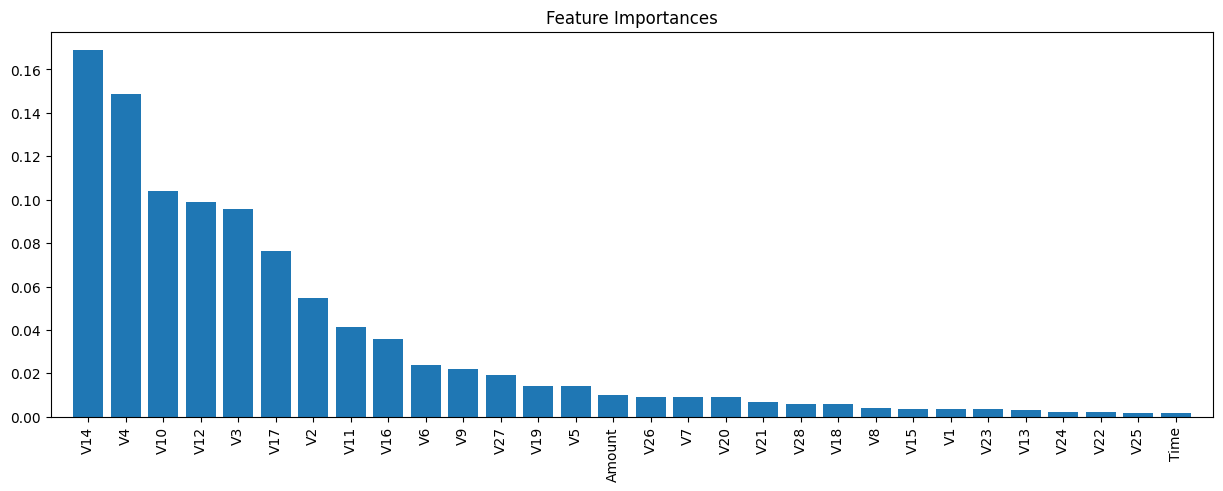

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load the dataset from a local file
file_path = 'creditcard.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# Explore the dataset
print(data.head())
print(data.info())
print(data.describe())

# Check for missing values and handle them (if any)
if data.isnull().sum().sum() > 0:
    print("Missing values detected. Handling missing values...")
    data = data.fillna(data.median())

# Check the class distribution
print(data['Class'].value_counts())

# Split the dataset into features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Address class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optionally, you can also visualize feature importance
import matplotlib.pyplot as plt

# Get feature importances
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 5))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), data.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()